# Price Relative

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:price_relative

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'tsla'
symbol2 = '^GSPC'
start = '2020-10-01'
end = '2023-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.concat([df1['Adj Close'], df2['Adj Close']],axis=1)

In [4]:
# Rename columns
df.columns = [symbol1,symbol2]

In [6]:
df['Price Relative'] = df['tsla']/df['^GSPC']
df['Percentage Change in Price Relative'] = ((df['Price Relative']-df['Price Relative'].shift())/df['Price Relative'].shift())*100

In [7]:
df.head()

,tsla,^GSPC,Price Relative,Percentage Change in Price Relative
Date,,,,
2020-10-01 00:00:00-04:00,149.386673,3380.800049,0.044187,NaN
2020-10-02 00:00:00-04:00,138.363327,3348.419922,0.041322,-6.483400
2020-10-05 00:00:00-04:00,141.893326,3408.600098,0.041628,0.740670
2020-10-06 00:00:00-04:00,137.993332,3360.969971,0.041058,-1.370336
2020-10-07 00:00:00-04:00,141.766663,3419.439941,0.041459,0.977745


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

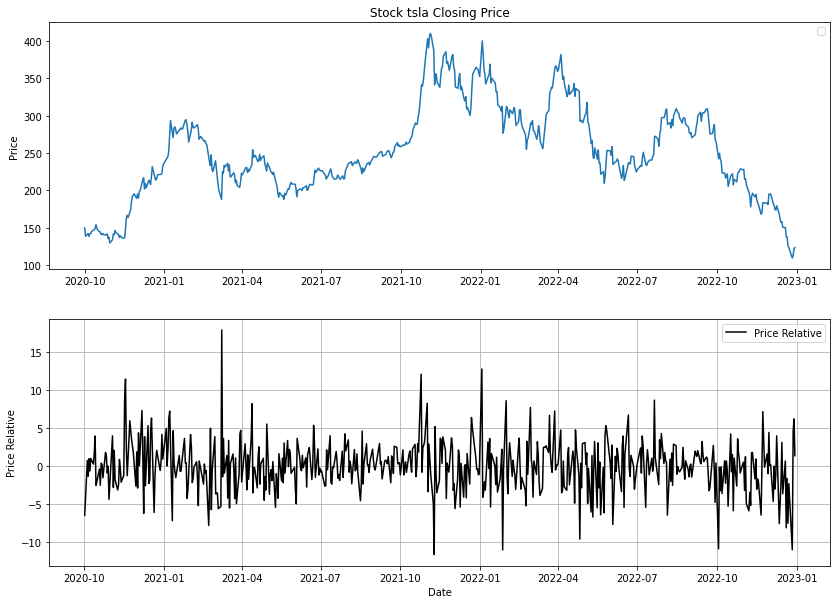

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Percentage Change in Price Relative'], label='Price Relative', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Relative')
ax2.set_xlabel('Date')

## Candlestick with Price Relative

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,18536.166667,146.919998,149.626663,144.806671,149.386673,149.386673,152224500,True
1,18537.166667,140.463333,146.376663,138.333328,138.363327,138.363327,214290000,False
2,18540.166667,141.116669,144.546661,139.776672,141.893326,141.893326,134168400,True
3,18541.166667,141.263336,142.926666,135.350006,137.993332,137.993332,147438900,False
4,18542.166667,139.956665,143.300003,137.949997,141.766663,141.766663,129383100,True


Text(0.5, 0, 'Date')

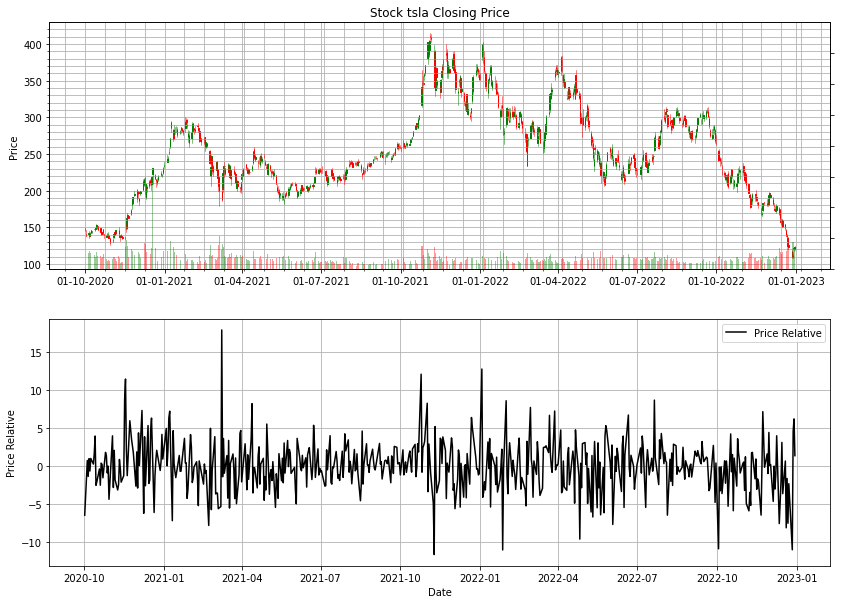

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Percentage Change in Price Relative'], label='Price Relative', color='black')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Price Relative')
ax2.set_xlabel('Date')